# Explore here

In [39]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')

In [40]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [41]:
from sklearn.model_selection import train_test_split
import numpy as np

X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =42)


TRAINING THE DATA ON A DECISION TREE MODEL

In [52]:
from sklearn.tree import DecisionTreeClassifier
dtm= DecisionTreeClassifier()
dtm.fit(X_train, y_train)

DecisionTreeClassifier()

In [59]:
dtm.feature_importances_

array([0.0396983 , 0.3102559 , 0.15762331, 0.05983414, 0.05937338,
       0.14769682, 0.11489407, 0.11062408])

In [60]:
from sklearn.feature_selection import SelectFromModel
features = SelectFromModel(DecisionTreeClassifier(random_state =42))
features.fit(X_train,y_train)



SelectFromModel(estimator=DecisionTreeClassifier(random_state=42))

In [62]:
selected_features = features.get_support()
X_train.columns[selected_features]

Index(['Glucose', 'BloodPressure', 'BMI'], dtype='object')

In [53]:
from sklearn.metrics import accuracy_score
y_pred = dtm.predict(X_test)


In [54]:

dtm_accuracy = accuracy_score(y_test, y_pred)
dtm_accuracy

0.7467532467532467

TRAINING DATA ON REGRESSION TREE MODEL

In [55]:
from sklearn.model_selection import train_test_split
import numpy as np

X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =42)


In [73]:
from sklearn.ensemble import RandomForestClassifier
rtm = RandomForestClassifier(n_estimators = 50, random_state = 42)
rtm.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [74]:
y_pred = rtm.predict(X_test)

rt_accuracy = accuracy_score(y_test, y_pred)
rt_accuracy

0.7077922077922078

DETERMINING WHICH ARE THE BEST FEATURES USED IN The MODEL

In [75]:
from sklearn.feature_selection import SelectFromModel
features = SelectFromModel(RandomForestClassifier(random_state =42))
features.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=42))

In [77]:
selected_features = features.get_support()
X_train.columns[selected_features]

Index(['Glucose', 'BMI', 'Age'], dtype='object')

GRADIENT BOOSTING MODEL TO ASSESS FOR IMPROVEMENT

In [93]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [94]:
y_pred = gb.predict(X_test)
gb_accuracy = accuracy_score(y_test, y_pred)
gb_accuracy

0.7467532467532467

GRIDSEARCH FOR BEST PARAMETERS FOR GRADIENT BOOSTING

In [81]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [15, 50, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4], 
    'min_samples_split': [2, 4], 
}

gb = GradientBoostingClassifier()
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)


8599.27s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
8599.45s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4],
                         'min_samples_split': [2, 4],
                         'n_estimators': [15, 50, 200]},
             scoring='accuracy')

In [82]:
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred = best_model.predict(X_test)

# Calculate and print the accuracy
gbgs_accuracy = accuracy_score(y_test, y_pred)
gbgs_accuracy

Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 15}


0.7857142857142857

IMPROVING MODEL FOR BEST ACCURACY USING XGBOOST

In [87]:
from xgboost import XGBClassifier
xgbmodel = XGBClassifier()
xgbmodel.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [108]:
xgbmodel.save_model("xgb_classifier_default_42.json")

In [88]:
y_pred = xgbmodel.predict(X_test)

xgbmodel_accuracy= accuracy_score(y_test, y_pred)
xgbmodel_accuracy

0.7077922077922078

GRiD SEARCH TO FIND BEST PARAMATERS FOR XGBOOST

In [102]:
import xgboost as xgb

param_grid = {
    'n_estimators': [15, 50, 100],  # Number of gradient boosted trees. Equivalent to number of boosting rounds
    'learning_rate': [None, 0.05, 0.15], 
    'max_depth': [None, 3, 5],
    'min_child_weight': [1, 3],
    'gamma': [0, 0.1, 0.2], 
}

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

grid_search = GridSearchCV(xgb_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

11297.98s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
11298.16s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0.1, 0.2],
                         'learning_rate': [None, 0.05, 0.15],
                         'max_depth': [None, 3, 5], 'min_child_weight': [1, 3],
                         'n_estimators': [15, 50, 100]},
             scoring='accuracy')

In [103]:
print("Best parameters:", grid_search.best_params_)
xbest = grid_search.best_estimator_

# Predict using the best model
y_pred = xbest.predict(X_test)

# Calculate and print the accuracy
xbest_accuracy = accuracy_score(y_test, y_pred)
xbest_accuracy

Best parameters: {'gamma': 0.2, 'learning_rate': None, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 15}


0.7402597402597403

In [106]:
import numpy as np

model_names = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'GB with GridSearch', 'XGBoost', 'XGBoost Best']

accuracies = np.array([dtm_accuracy, rt_accuracy, gb_accuracy, gbgs_accuracy, xgbmodel_accuracy, xbest_accuracy])
sorted_accuracies = np.sort(accuracies)[::-1]

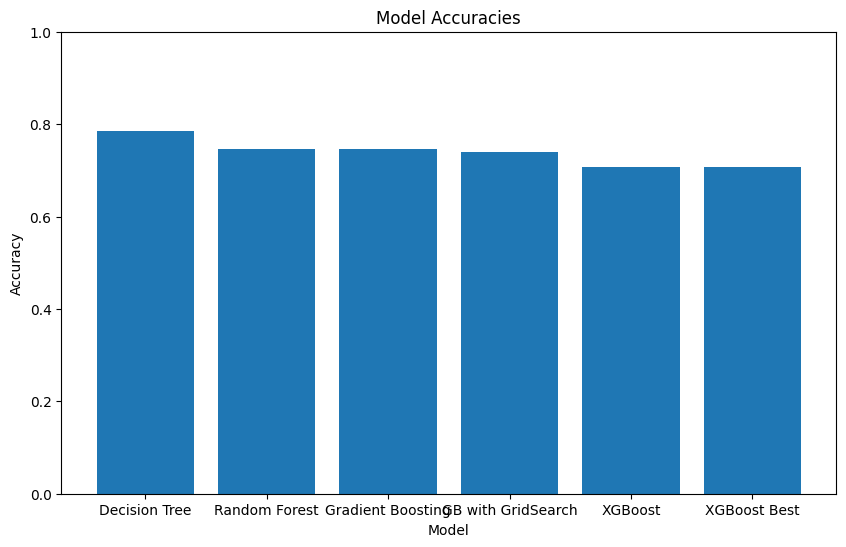

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(model_names, sorted_accuracies)
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylim((0,1))
plt.ylabel('Accuracy')
plt.show()
